                                                             Experiment-2 

### Based on the pima indian historical dataset build a ml library classification model to predict whether or not a patient has diabaties, the dataset concisits of several medical predictor values and one target variable ,predict or values include the number of pregnancy  the patient  has their BMI insulin level age and so on

In [159]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [160]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [162]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [163]:
print(df.isna().sum())
print("shape:",df.shape)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
shape: (768, 9)


### data preprocessing EDA

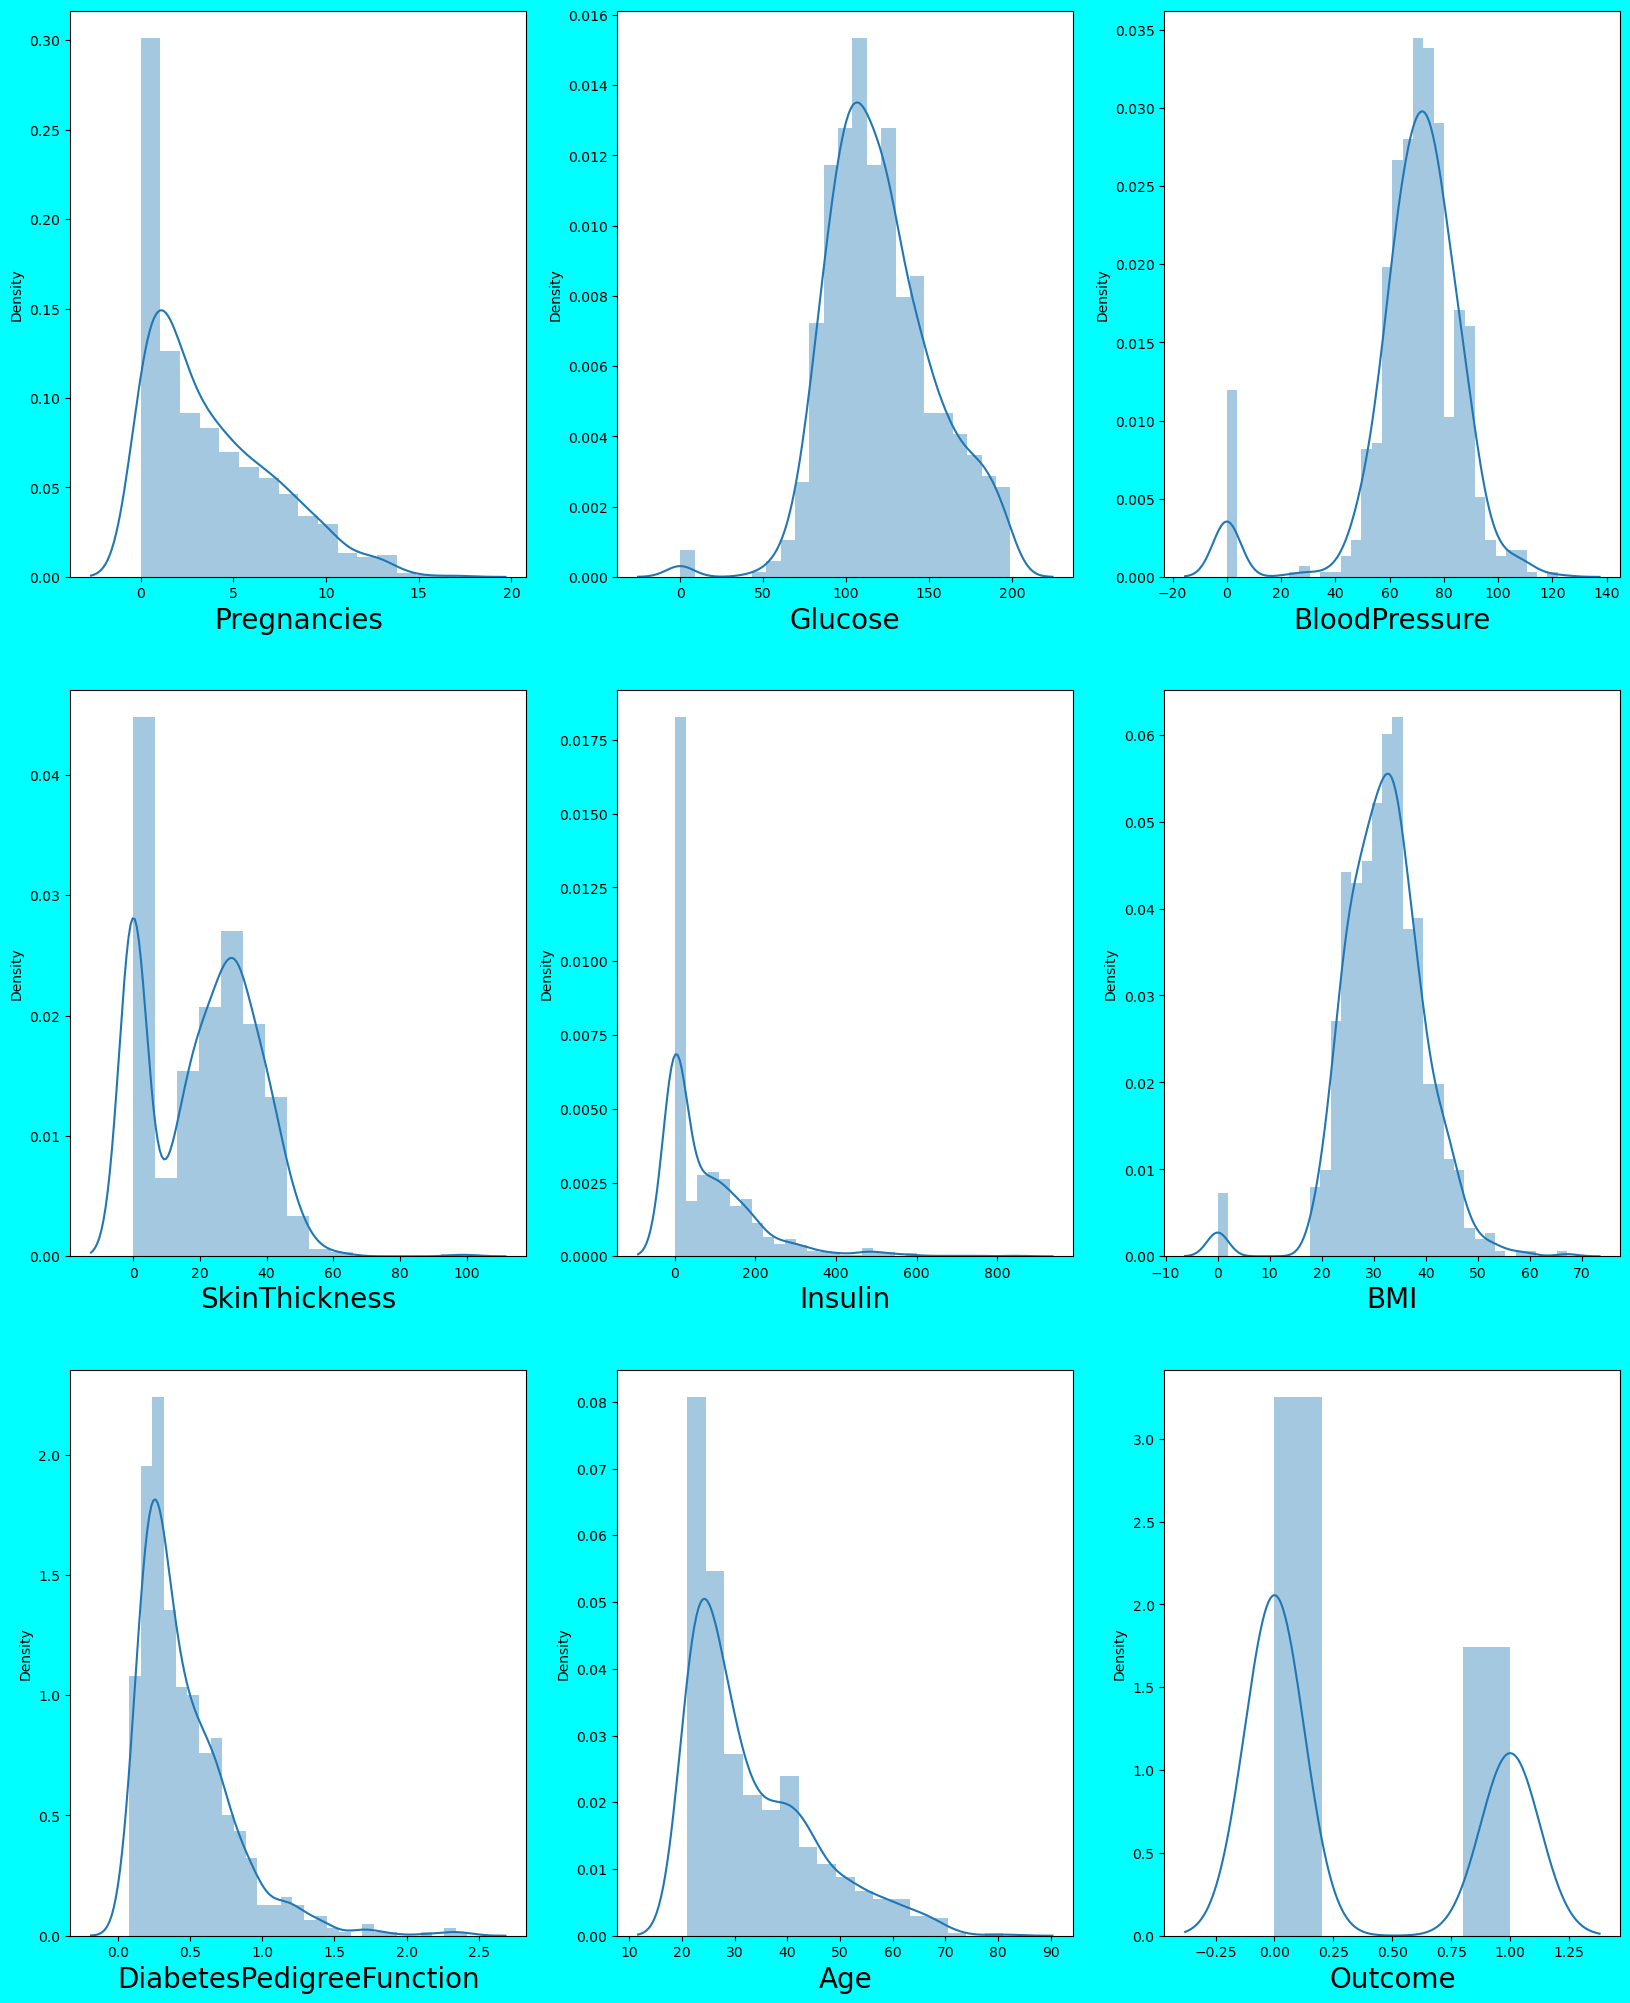

In [164]:
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

glucose,bmi,skinthickness, insulin, bloodpressure has zero values that cannot be possible replace it with mean


In [165]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [166]:
df["Glucose"] = df["Glucose"].replace(0, df['Glucose'].mean())

In [167]:
df["BloodPressure"] = df["BloodPressure"].replace(0, df['BloodPressure'].mean())

In [168]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df['SkinThickness'].mean())

In [169]:
df["Insulin"] = df["Insulin"].replace(0, df['Insulin'].mean())

In [170]:
df["BMI"] = df["BMI"].replace(0, df['BMI'].mean())

In [171]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


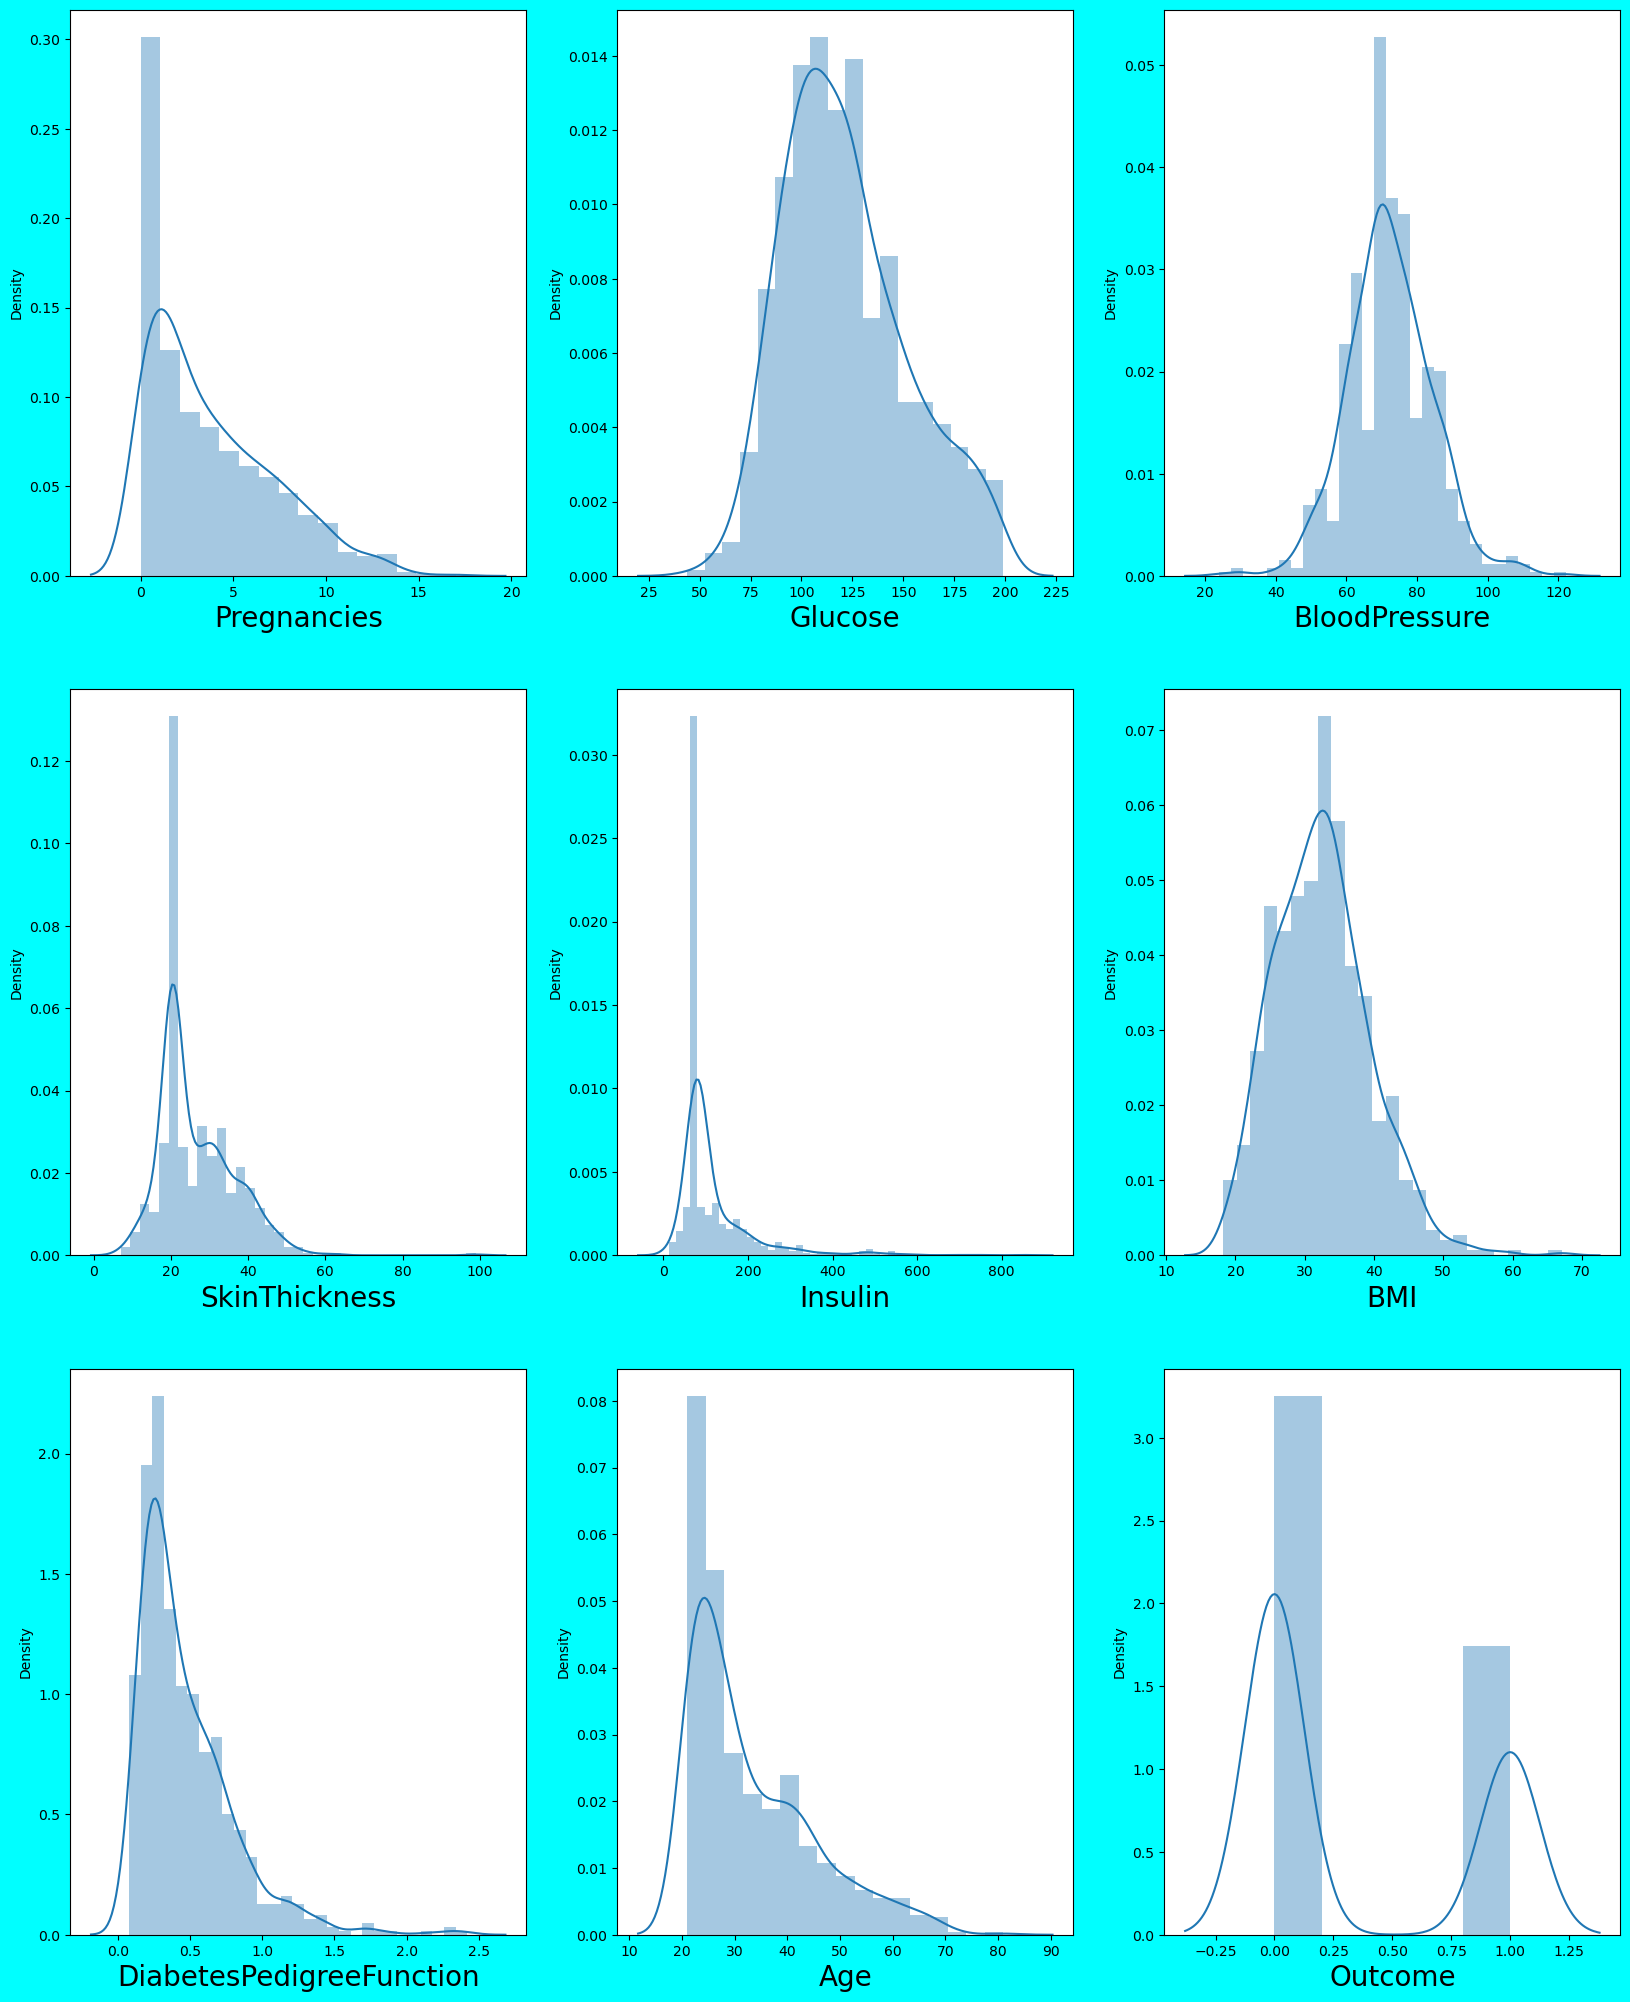

In [172]:
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

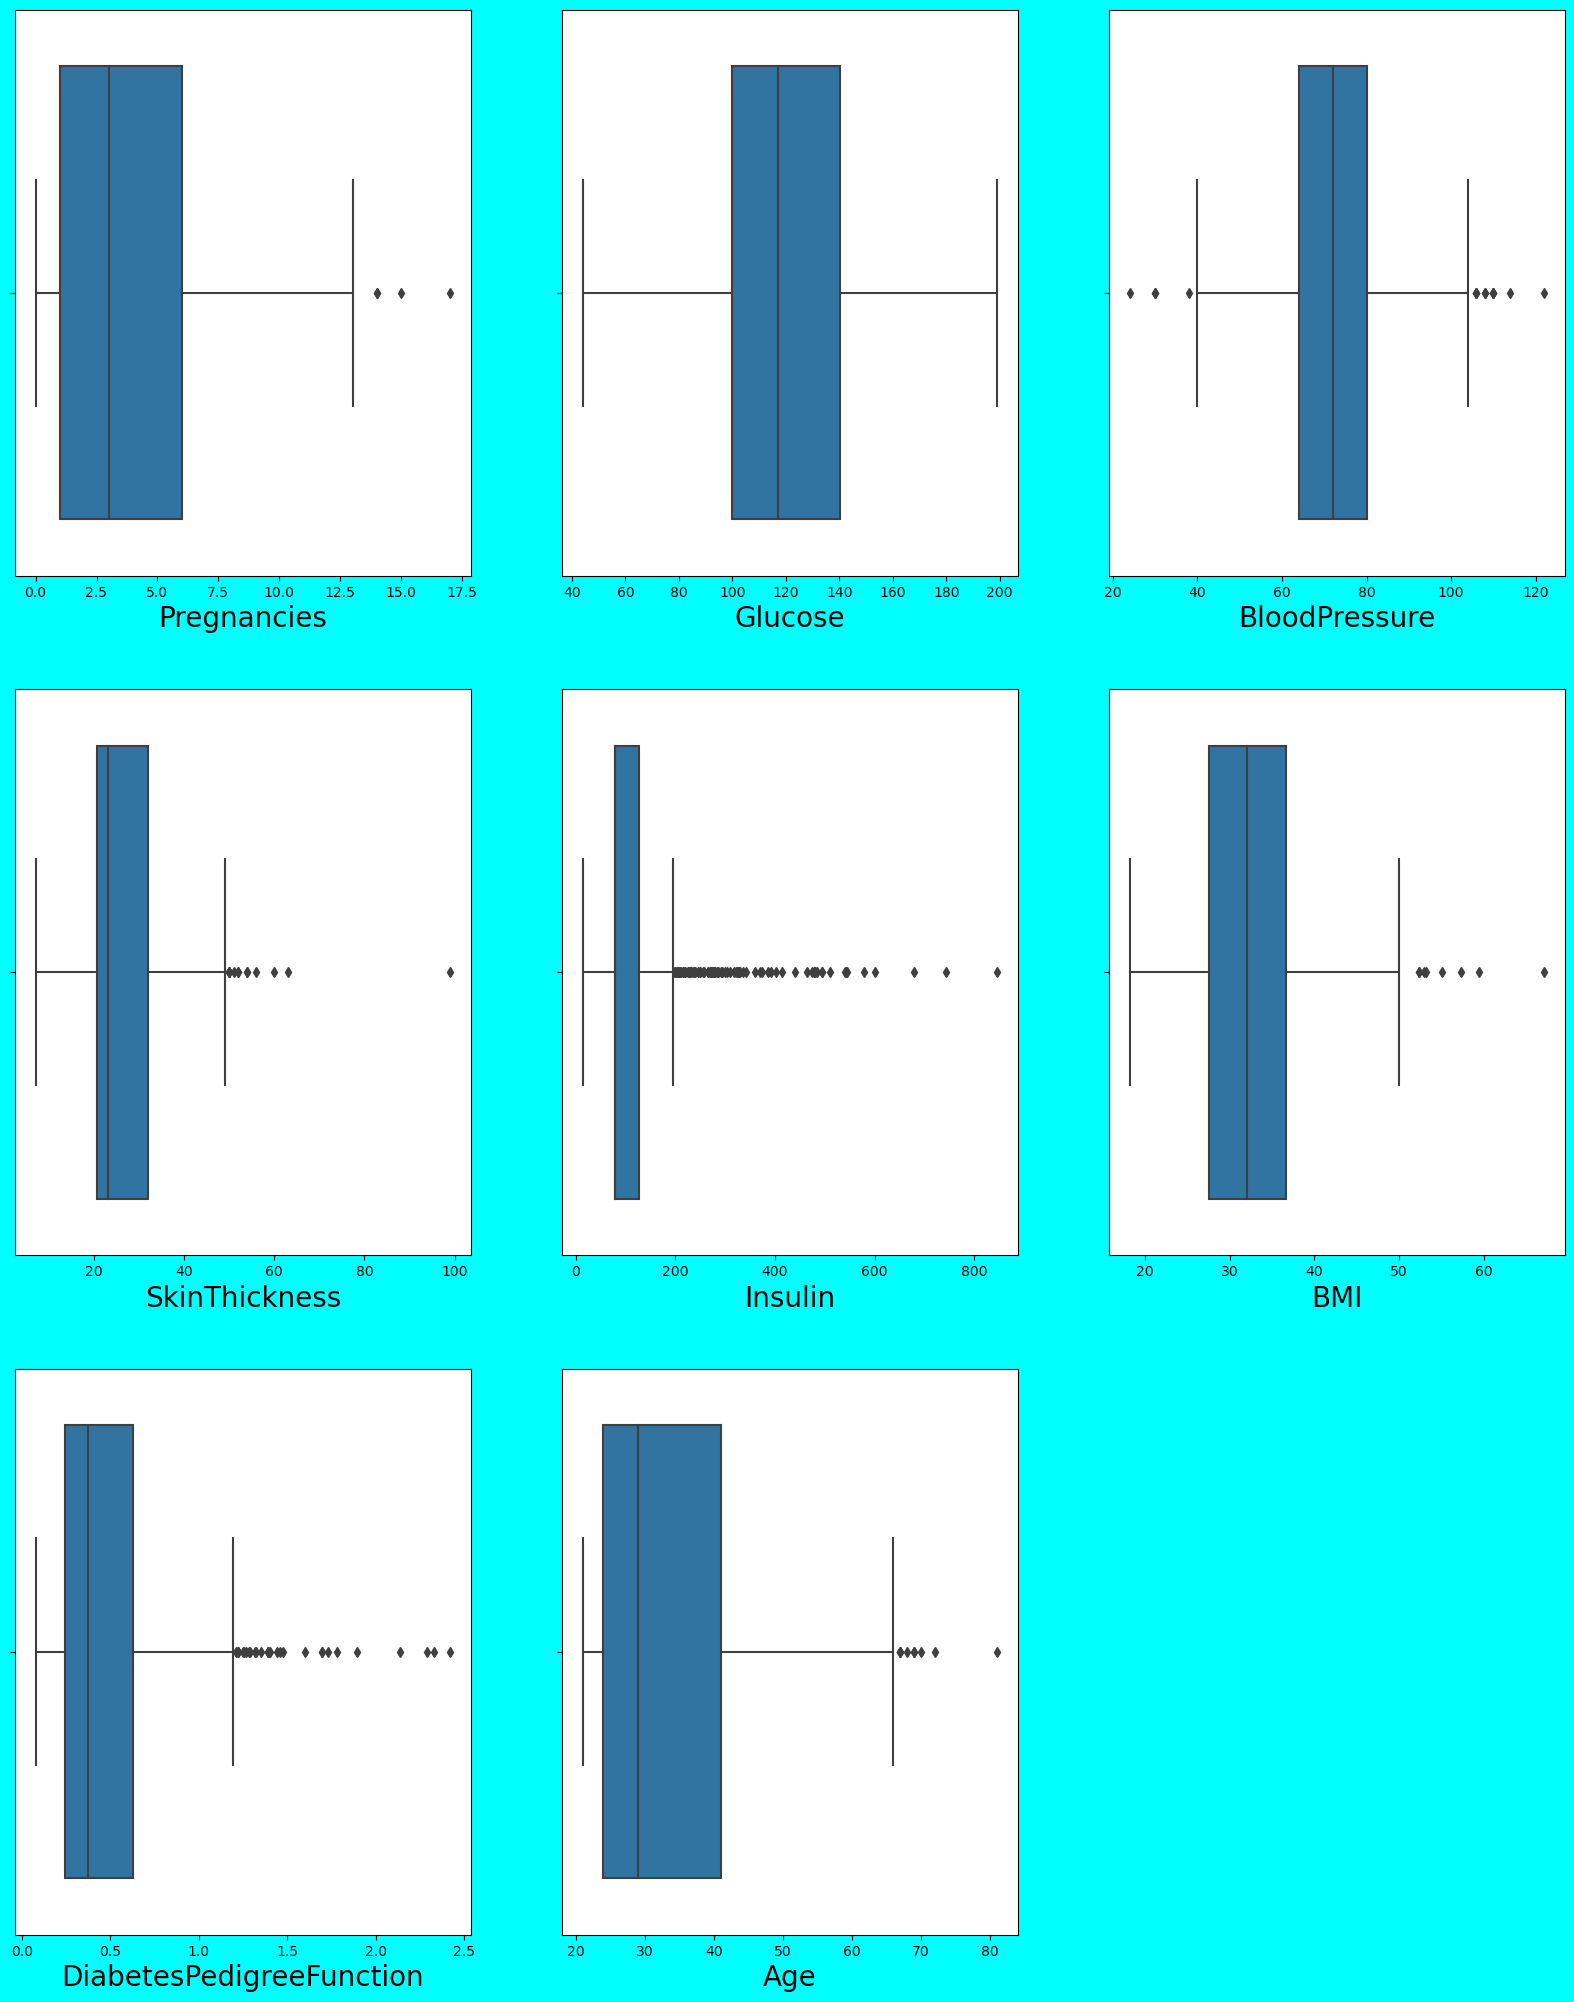

In [173]:
df_features = df.drop("Outcome", axis  =1)
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df_features:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [174]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [175]:
preg_high=(q3.Pregnancies +1.5 * iqr.Pregnancies)
blood_high=(q3.BloodPressure +1.5 * iqr.BloodPressure)

skin_high=(q3.SkinThickness +1.5 * iqr.SkinThickness)
Insulin_high=(q3.Insulin +1.5 * iqr.Insulin)
bmi_high=(q3.BMI +1.5 * iqr.BMI)

age_high=(q3.Age +1.5 * iqr.Age)
Diabetes_high=(q3.DiabetesPedigreeFunction +1.5 * iqr.DiabetesPedigreeFunction)
blood_low=(q1.BloodPressure -1.5 * iqr.BloodPressure)
print(preg_high,blood_high,skin_high,Insulin_high,bmi_high,age_high,Diabetes_high,blood_low)

13.5 104.0 49.1953125 198.42578125 50.25 66.5 1.2 40.0


### removing outliers in pregnancy data

In [176]:
index1=np.where(df["Pregnancies"]>preg_high)
df=df.drop(df.index[index1])
index1


(array([ 88, 159, 298, 455], dtype=int64),)

### removing outliers in SkinThickness data

In [177]:
index8=np.where(df["SkinThickness"]>skin_high)

df=df.drop(df.index[index8])
index8


(array([ 57,  86,  98, 119, 149, 209, 271, 273, 442, 528, 575, 587],
       dtype=int64),)

### removing outliers in insulin data

In [178]:
index3=np.where(df["Insulin"]>Insulin_high)
df=df.drop(df.index[index3])
index3


(array([  8,  13,  16,  20,  31,  39,  43,  53,  54,  56,  72,  92, 107,
        127, 134, 139, 147, 155, 179, 188, 192, 199, 207, 212, 220, 223,
        239, 240, 246, 250, 269, 276, 277, 286, 287, 298, 309, 324, 348,
        349, 353, 359, 364, 377, 381, 384, 398, 401, 404, 413, 414, 440,
        445, 467, 472, 473, 474, 498, 506, 524, 526, 531, 532, 541, 547,
        560, 569, 578, 590, 592, 596, 629, 639, 641, 646, 657, 663, 669,
        679, 684, 691, 694, 697, 699, 705, 732, 737], dtype=int64),)

### removing outliers in bloodpressure data

In [179]:
index2=np.where(df["BloodPressure"]>blood_high)
df=df.drop(df.index[index2])
index2

(array([ 72,  90, 152, 311, 472, 568, 581, 597], dtype=int64),)

In [180]:
index7=np.where(df["BloodPressure"]<blood_low)
df=df.drop(df.index[index7])
index7

(array([ 15, 105, 508, 510], dtype=int64),)

### removing outliers in BMI data

In [181]:
index4=np.where(df["BMI"]>bmi_high)
df=df.drop(df.index[index4])
index4

(array([162, 252], dtype=int64),)

### removing outliers in DiabetesPedigreeFunction

In [182]:
index6=np.where(df["DiabetesPedigreeFunction"]>Diabetes_high)
df=df.drop(df.index[index6])

index6

(array([  4,  11,  37,  46,  82, 122, 156, 181, 203, 205, 215, 243, 255,
        275, 310, 321, 453, 501, 520, 523, 524, 557, 559], dtype=int64),)

### removing outliers in age

In [183]:
index5=np.where(df["Age"]>age_high)
df=df.drop(df.index[index5])
index5

(array([ 97, 290, 365, 369, 395, 439, 540, 546, 555], dtype=int64),)

In [184]:
df.shape

(619, 9)

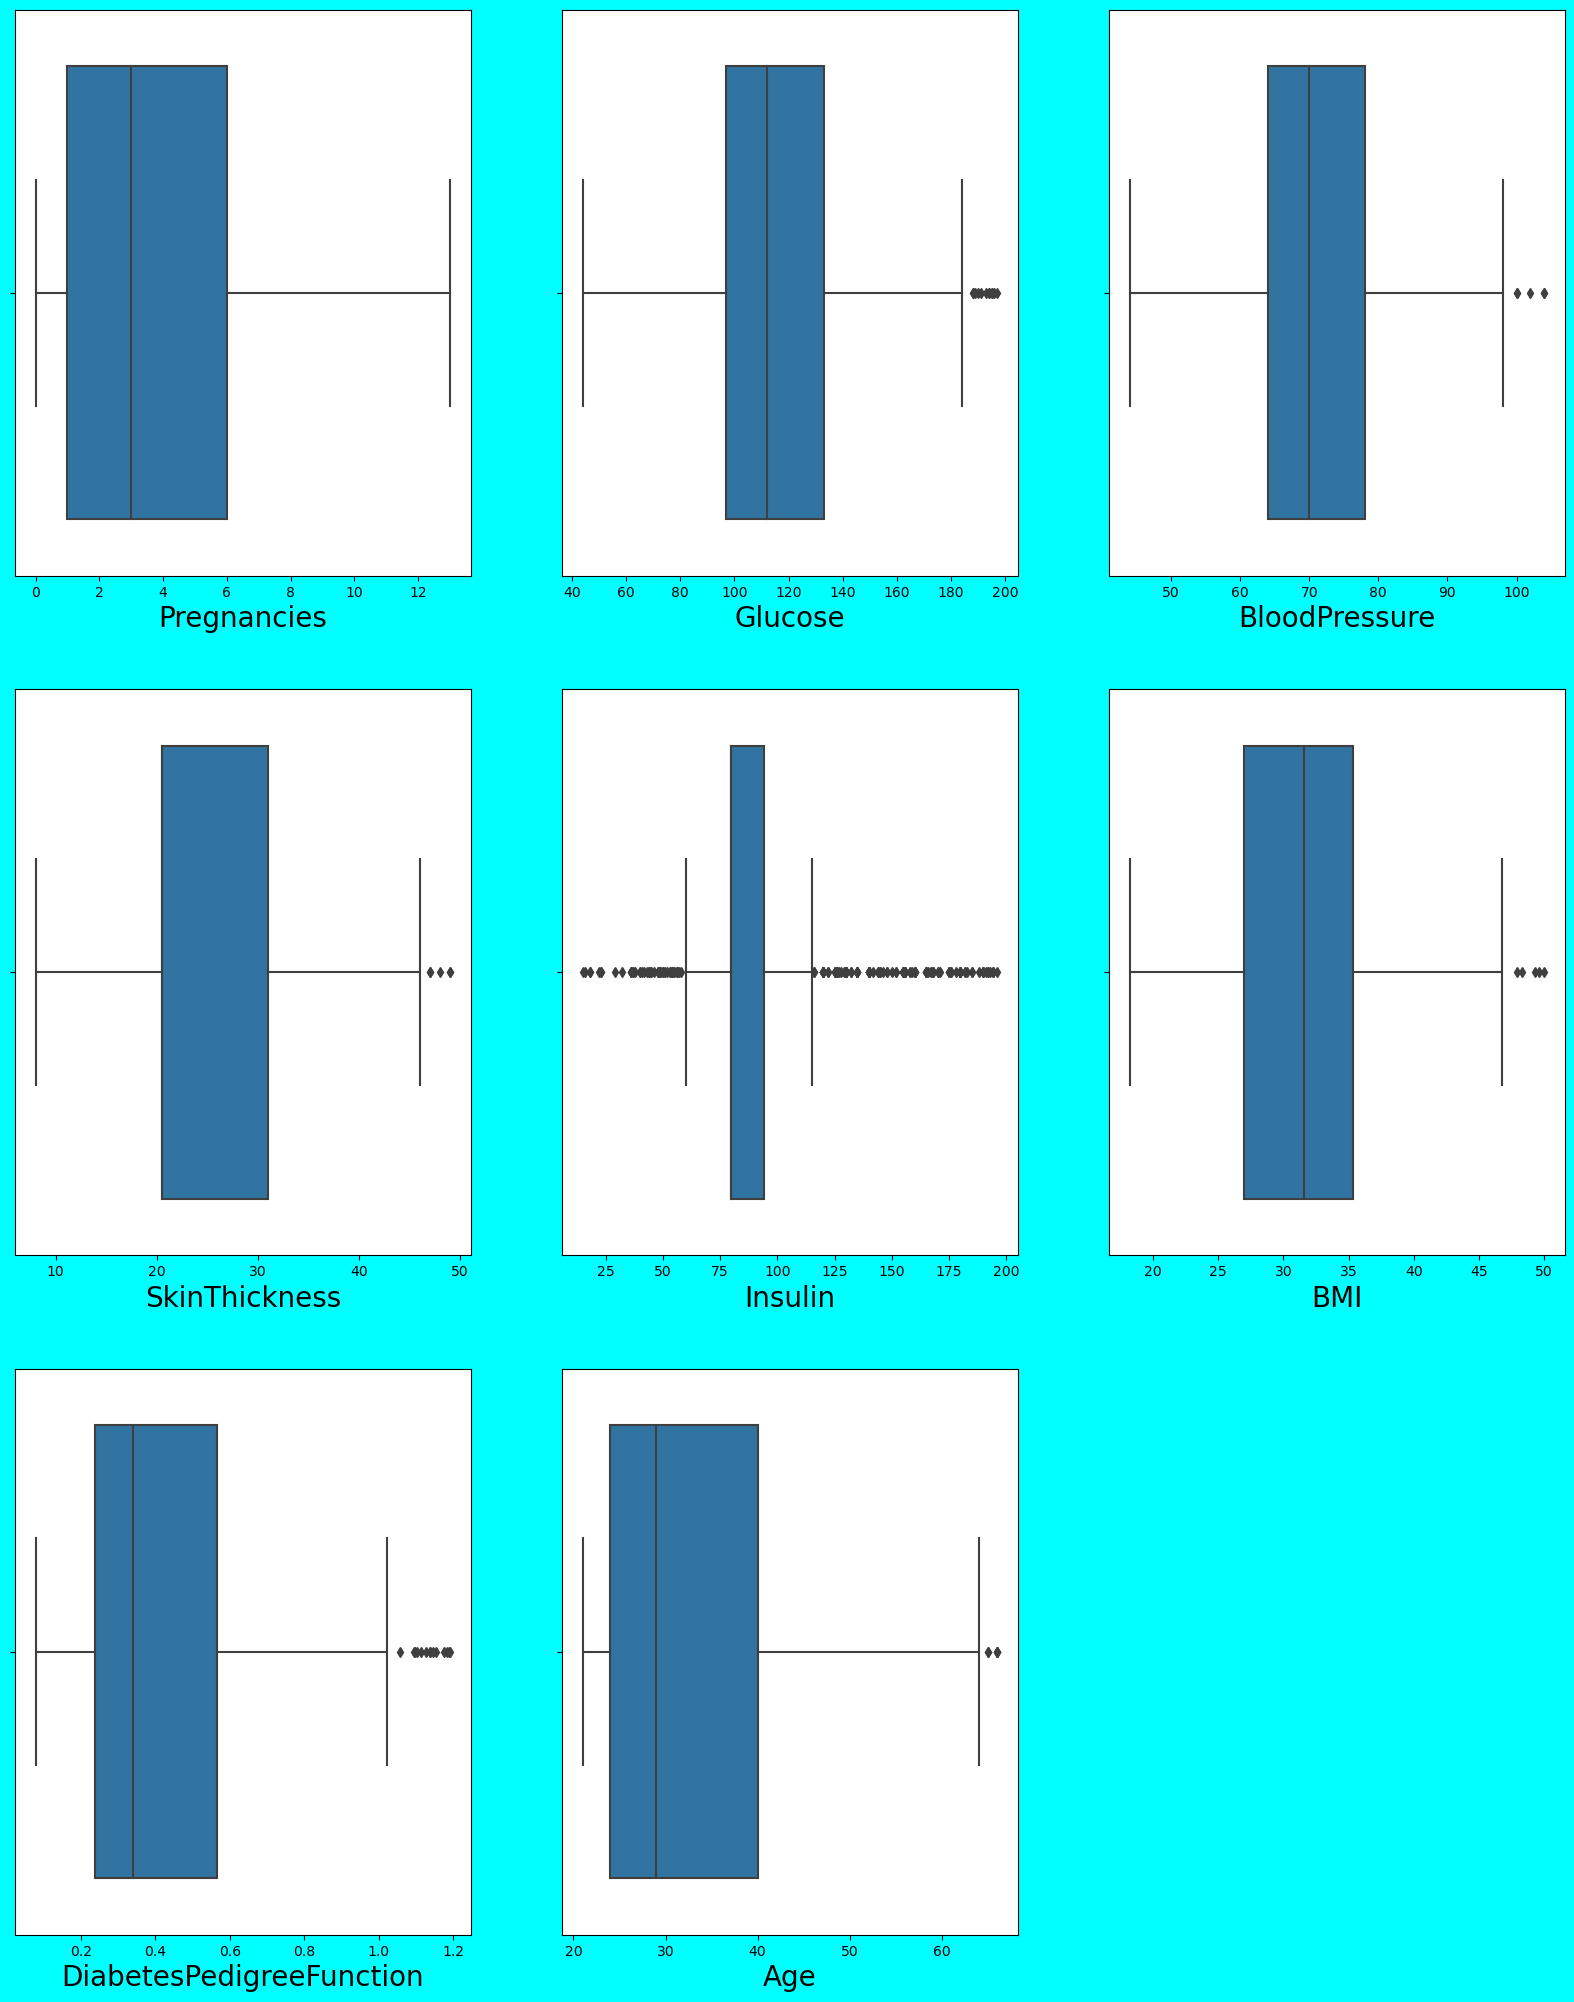

In [186]:
df_features = df.drop("Outcome", axis  =1)
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df_features:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

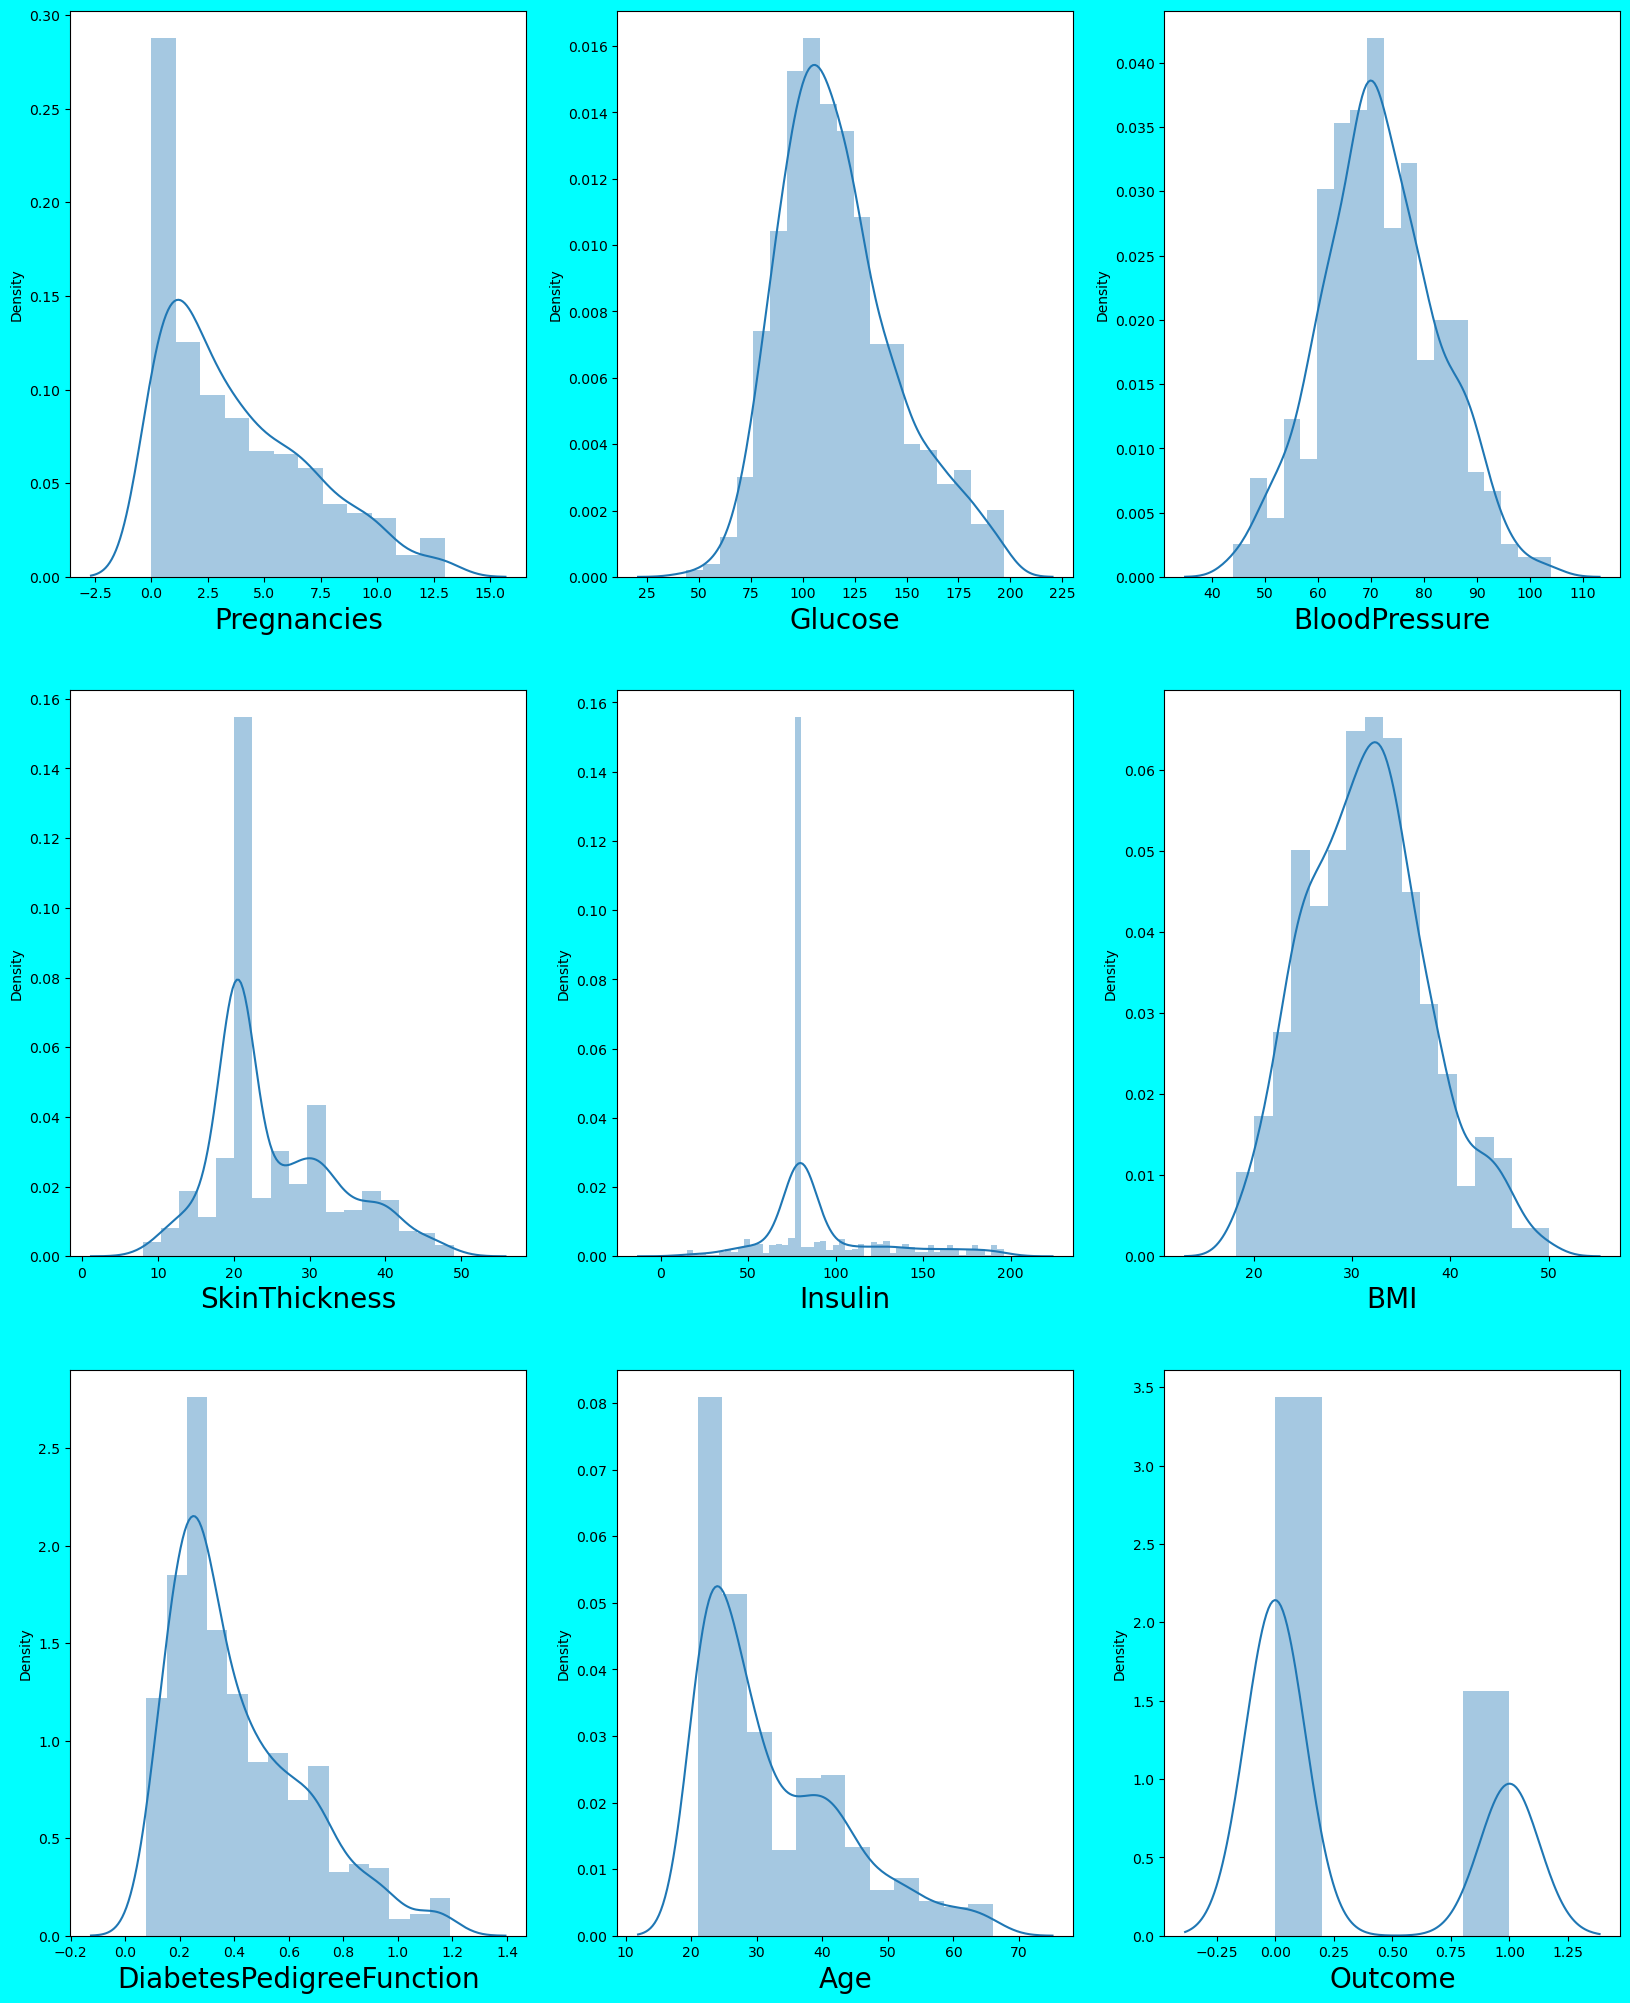

In [187]:
plt.figure(figsize=(20,25),facecolor="cyan")
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [189]:
X = df.drop("Outcome", axis =1)
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [191]:
y = df["Outcome"]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
508,2,84.0,50.0,23.0,76.000000,30.4,0.968,21
539,3,129.0,92.0,49.0,155.000000,36.4,0.968,32
42,7,106.0,92.0,18.0,79.799479,22.7,0.235,48
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50
761,9,170.0,74.0,31.0,79.799479,44.0,0.403,43


In [196]:
lg = LogisticRegression()

In [197]:
lg.fit(X_train,y_train)

LogisticRegression()

In [199]:
y_pred = lg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [201]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
X_actual = y_test
Y_predic = y_pred
results = confusion_matrix(X_actual, Y_predic)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(X_actual, Y_predic))
print ('Classification Report : ')
print (classification_report(X_actual, Y_predic))
print('AUC-ROC:',roc_auc_score(X_actual, Y_predic))
print('LOGLOSS Value is',log_loss(X_actual, Y_predic))

Confusion Matrix :
[[118  15]
 [ 17  36]]
Accuracy Score is 0.8279569892473119
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       133
           1       0.71      0.68      0.69        53

    accuracy                           0.83       186
   macro avg       0.79      0.78      0.79       186
weighted avg       0.83      0.83      0.83       186

AUC-ROC: 0.7832316640658249
LOGLOSS Value is 5.942219562358036


In [202]:
# Accuracy
tp = results[0][0:1]
fp = results[0][1:]
tn = results[1][1:]
fn = results[1][0:1]

manual_accuracy = (tp+tn)/(tp+tn+fp+fn)
manual_accuracy

array([0.82795699])

In [203]:
mannaul_precesion = tp/(tp+fp)
mannaul_precesion

array([0.88721805])

In [204]:
# recall
manual_recall = tp/(tp+fn)
manual_recall

array([0.87407407])

In [207]:
f1 = 2 * (mannaul_precesion * manual_recall) / (mannaul_precesion + manual_recall)
f1

array([0.88059701])